## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Reviewing the data from first input file
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Reviewing the data from first input file
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID

# Identifying the row that contains duplicate data
study_results.loc[study_results.duplicated()==True]
# removing the duplicate row
study_results_clean=study_results.drop_duplicates()
print(f"Original study_results number of samples - {len(study_results)}, cleaned up number of samples - {len(study_results_clean)}")

Original study_results number of samples - 1893, cleaned up number of samples - 1892


In [5]:
# Combine the data into a single dataset
all_data_inner=pd.merge(mouse_metadata,study_results_clean,on='Mouse ID', how='inner')
all_data_inner.head()

all_data_outer=pd.merge(mouse_metadata,study_results_clean,on='Mouse ID', how='outer')
all_data_outer.head()

# Compare inner vs outser merge results
# print(f"Merged data row count:\nInner\t\t{len(all_data_inner)}\nOuter\t\t{len(all_data_outer)}")

# Since it seems that type of merging has no effect, we can assume that each table contains exactly 
# the same number of values and values themselves of the Mouse ID
all_data=pd.merge(mouse_metadata,study_results_clean,on='Mouse ID')

# Display the data table for preview
all_data.head()

Merged data row count:
Inner		1892
Outer		1892


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
nmb_mice=all_data['Mouse ID'].nunique()
print(f"Number of mice\t\t{nmb_mice}")

Number of mice		249


In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_id_duplicate=study_results.loc[study_results.duplicated()==True]['Mouse ID'].unique()[0]
print(f"Mouse ID which had duplicate data:\t{mouse_id_duplicate}")

Mouse ID which had duplicate data:	g989


In [44]:
# Optional: Get all the data for the duplicate mouse ID.
g989_data=all_data[all_data['Mouse ID']== mouse_id_duplicate]
                   
# Group all data by Drug Regimen
all_data_by_drug=all_data.groupby(['Drug Regimen'])

# pull out statistics on Tumor Volume (mm3)
all_data_by_drug['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,160.0,52.368318,6.502160,45.000000,47.107256,50.909965,56.259803,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
all_data_wo_g989=all_data[all_data['Mouse ID']!= mouse_id_duplicate]
all_data_wo_g989.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
nmb_mice_wo_g989=all_data_wo_g989['Mouse ID'].nunique()
print(f"Number of mice\t\t{nmb_mice_wo_g989}")

Number of mice		248


## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group all data by Drug Regimen
all_data_by_drug=all_data.groupby(['Drug Regimen'])

# Set up data dictionary to later convert to summary data frame
tumor_vol_by_drug_dic={
    # pull out statistics on Tumor Volume (mm3)
    "Mean" : all_data_by_drug['Tumor Volume (mm3)'].mean(),
    "Median" : all_data_by_drug['Tumor Volume (mm3)'].median(),
    "Variance" : all_data_by_drug['Tumor Volume (mm3)'].var(),
    "Standard deviation" : all_data_by_drug['Tumor Volume (mm3)'].std(),
    "Standard error of the mean" : all_data_by_drug['Tumor Volume (mm3)'].sem()
}
tumor_vol_by_drug=pd.DataFrame(tumor_vol_by_drug_dic)
tumor_vol_by_drug

,Mean,Median,Variance,Standard deviation,Standard error of the mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
all_data_by_drug['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug regiment'>

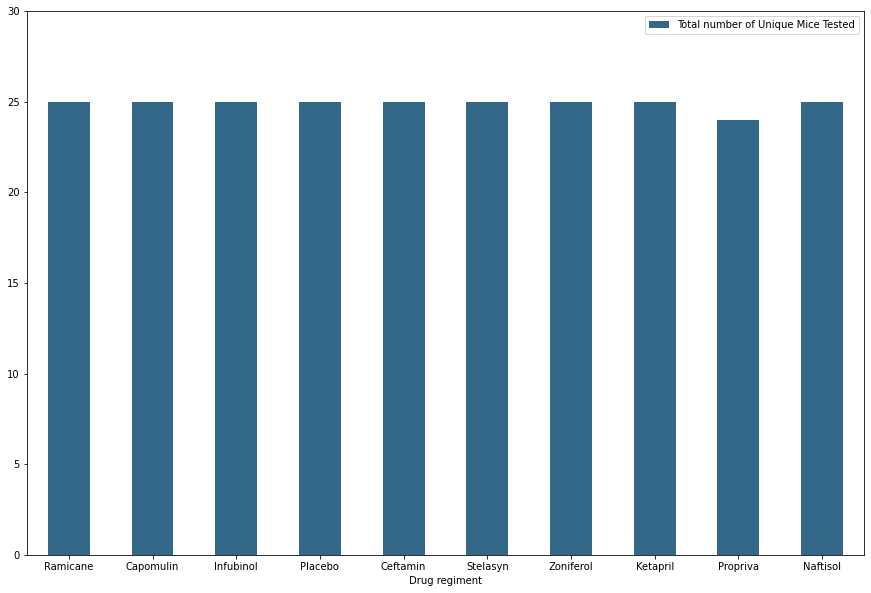

In [83]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# List of unique drug names
list_of_drugs=all_data['Drug Regimen'].unique()

# Creating a pandas dataframe
df = pd.DataFrame({'Drug regiment': list_of_drugs, 
                   'Total number of Unique Mice Tested': all_data_by_drug['Mouse ID'].nunique()})
  
# Creating a bar graph of size 15 inches wide and 10 inches high
df.plot(kind='bar',
        x='Drug regiment', 
        y='Total number of Unique Mice Tested', 
        rot=0, 
        color='#346888',
        figsize=(15, 10), 
        ylim=(0,30))


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

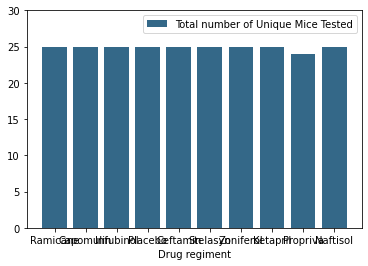

In [91]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.bar(list_of_drugs,
        all_data_by_drug['Mouse ID'].nunique(), 
        color='#346888', 
#         width=0.65,
        label="Total number of Unique Mice Tested")
plt.ylim([0,30])
plt.xlabel("Drug regiment")
plt.legend()
# plt.xlabel()
plt.tight_layout
# pd.plot.bar(x=list_of_drugs, y=all_data_by_drug['Mouse ID'].nunique(), rot=0, figsize=(15, 10))

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
values=all_data['Sex'].value_counts()
labels=all_data['Sex'].unique()

df.plot(kind='pie',y=y,label=labels, figsize=(5, 5))


KeyError: "None of [Int64Index([958, 934], dtype='int64')] are in the [columns]"

Male      958
Female    934
Name: Sex, dtype: int64

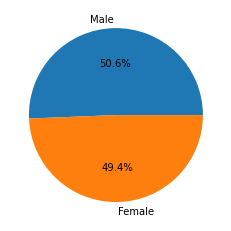

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(all_data['Sex'].value_counts(), labels=all_data['Sex'].unique(), autopct="%1.1f%%")
all_data['Sex'].value_counts()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
